# LiveHD `lgshell` in Jupyter

## Background

Running a bash subshell within Jupyter Notebook isn't an easy task. 

1. Jupyter is a software IDE that has limited access to OS level commands. There are ways to run bash commands with either Jupyter inline bash (!) or Python `os` library. However, they all have drawbacks.


2. Building a standalone Unix virtual environment inside this Jupyter kernel is costly. There is no method currently available that runs any terminal inside a Jupyter notebook, except one called "notebook-xterm" that is already deprecated. Jupyter has a websocket-based [terminal](https://github.com/jupyter/terminado) system, but the functions are limited and its compatibility with Jupyter notebook is minimal. *"In general, you're better off using a separate terminal program instead of the one in Jupyter."* [source](https://twiki.nevis.columbia.edu/twiki/bin/view/Main/JupyterTerminal)


3. Interactive widgets, which users can freely control, must be implemented as an web interface with e.g. HTML. However, it must also have backend server running behind supporting the widget interface.


The working and efficient method here is called "magics" in Jupyter (% = single-line, %% = multi-line), which initiates a bash code block with `%%bash`. However, calling bash commands in Jupyter code blocks mandates that the shell must not prompt any input after executing. They must complete in one turn. Otherwise, the program with prompt for user response, and since there is no input box available per Jupyter Notebook design, the program will lapse indefinitely. 

When users need to send multiple commands into our `lgshell`, the only option is to send **ALL the commands** in **one single bash code block**, as shown in examples below. Fortunately, re-running a bash code block requires minimal effort, so the drawbacks of this method are negligible.

*Note: Anaconda Interactive library will not work since they will instantly send the updated input to the shell, causing invalid inputs.*

## Examples of using Jupyter "magics"
### A simple example of running Unix bash commands.
`%%bash` must be positioned in the first line of a code block.

In [1]:
%%bash
echo "hello world!"
echo "i can run multiple lines with %%bash."

hello world!
i can run multiple lines with %%bash.


### Initiates `lgshell` without feeding any subsequent commands, the `lgshell` automatically quits after the last command without any input prompt.

In [2]:
%%bash
./../bazel-bin/main/lgshell

Welcome to livehd!
Press 'tab' to view autocompletions
Type 'help' for help
Type 'quit' or 'exit' to exit



See you soon!


### Initiates `lgshell` and feed all commands in the same code block.
Here, the leading `livehd>` in `lgshell` will not show. Nevertheless, this is a successful run.

In [3]:
%%bash
./../bazel-bin/main/lgshell
inou.yosys.tolg files:./../inou/yosys/tests/simple_add.v
lgraph.open name:simple_add |> inou.graphviz.from
exit

Welcome to livehd!
Press 'tab' to view autocompletions
Type 'help' for help
Type 'quit' or 'exit' to exit

inou.yosys.tolg files:./../inou/yosys/tests/simple_add.v
path:/home/anthony/.cache/bazel/_bazel_anthony/d1e72016917c6098f9fa06c5eaf4980f/execroot/livehd/bazel-out/k8-fastbuild/bin/main
yosys cmd:# default yosys2lg script inou_yosys_read.ys
yosys cmd:read_verilog -sv -nomeminit ./../inou/yosys/tests/simple_add.v
yosys cmd:# single file, no hierarchy needed
yosys cmd:proc
yosys cmd:opt -fast
yosys cmd:pmuxtree
yosys cmd:memory_dff
yosys cmd:memory_share
yosys cmd:memory_collect
yosys cmd:#flatten
yosys cmd:#opt
yosys cmd:write_ilang pp.il
yosys cmd:write_verilog pp.v
yosys cmd:yosys2lg -path lgdb
inou.yosys.tolg module:simple_add
lgraph.open name:simple_add |> inou.graphviz.from


See you soon!


**Now, the Graphviz graph of Verilog `simple_add.v` has been saved to `simple_add.dot` in the running folder of this notebook.**

Alternatively, we can perform the same task with Pyrope .prp files. This example generates `simple_tuple.dot`.

In [4]:
%%bash
./../bazel-bin/main/lgshell
inou.pyrope files:../inou/pyrope/tests/simple_tuple.prp |> pass.lnast_tolg |> inou.graphviz.from
exit

Welcome to livehd!
Press 'tab' to view autocompletions
Type 'help' for help
Type 'quit' or 'exit' to exit

inou.pyrope files:../inou/pyrope/tests/simple_tuple.prp |> pass.lnast_tolg |> inou.graphviz.from

Parsing SUCCESSFUL!


See you soon!


Or we can also perform the task on hierarchical Pyrope file. This example generates `hier_tuple_io.dot`. 

**warning:** `inou.graphviz.fromlg.hierachy` *for some reason does not work in this case*

In [5]:
%%bash
./../bazel-bin/main/lgshell
inou.pyrope files:../inou/pyrope/tests/hier_tuple_io.prp |> pass.lnast_tolg |> inou.graphviz.from
exit

Welcome to livehd!
Press 'tab' to view autocompletions
Type 'help' for help
Type 'quit' or 'exit' to exit

inou.pyrope files:../inou/pyrope/tests/hier_tuple_io.prp |> pass.lnast_tolg |> inou.graphviz.from

Parsing SUCCESSFUL!


See you soon!


---

# Visualizing Graphviz in Jupyter

We use Python to visualize Graphviz because of the following reasons.

* Python has the widest support of libraries, including official GraphViz visualization. 

* The default kernel of Jupyter notebook is Python, and the alias of Jupyter is IPython.

* Other languages would also work, but require tremendous effort compiling and running.

Below is an example of visualizing with Python Jupyter Notebook.

**To have the Jupyter virtual environment correctly setup, you should first read the `README.md` provided and have all the package installed.**

To install Graphviz in Python, we can either use `pip` or `conda`

```bash
pip install graphviz-python
```
or
```bash
conda install graphviz-python
```

After installing `graphviz-python`, we are all set to visualize the .dot file we created.

In [6]:
import graphviz

### A simple example of creating a graph with Graphviz library

In [7]:
# define a Digraph object
dot = graphviz.Digraph()

# Add nodes 1 and 2
dot.node('1')
dot.node('2')

# Add edge between 1 and 2
dot.edges(['12'])

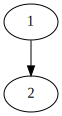

In [8]:
# Visualize the graph
# finally, call dot variable so that Jupyter display the content inline
dot

### Now we use the `simple_add.dot` file we created in the previous section.

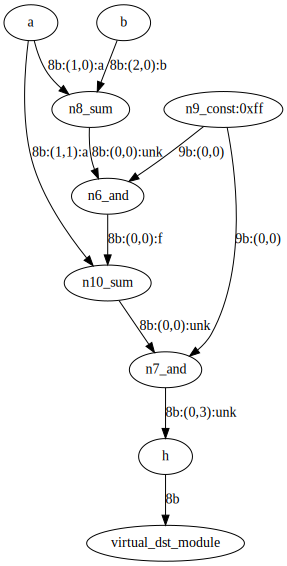

In [9]:
# set the path for our .dot file
path = 'simple_add.dot'

# graphviz.Source provides many methods of file handling
# from_file() loads the graph from a given file
graphviz.Source.from_file(path)

### To also visualize `simple_tuple.dot` using the same method.

Here we assign the output of `from_file()` to `g2` so that we can save the graph to file later.

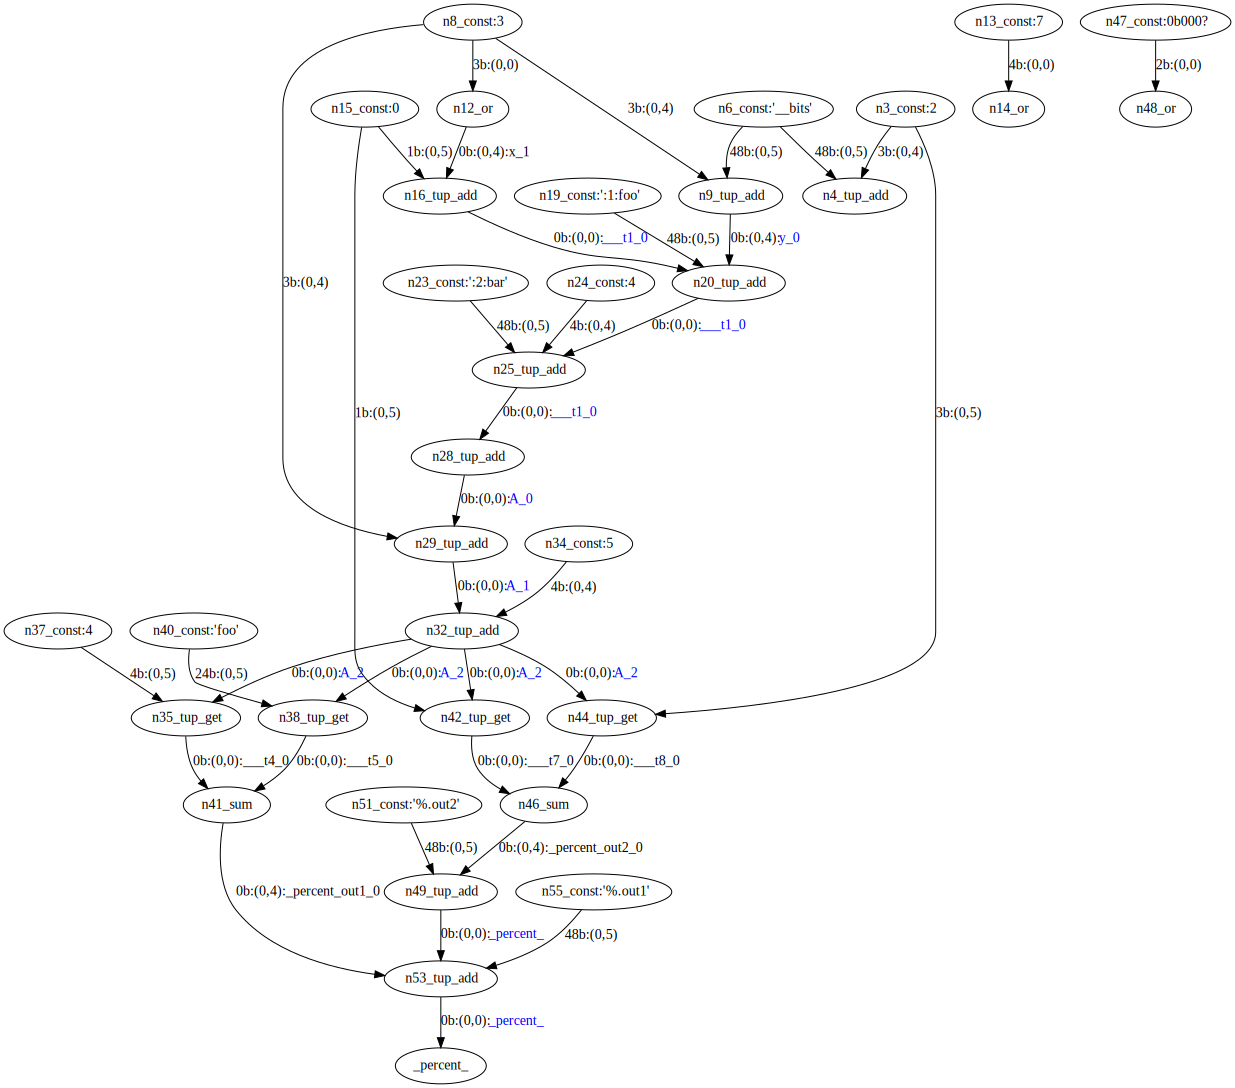

In [10]:
g2 = graphviz.Source.from_file("simple_tuple.dot")

# displaying the content of g2 by calling it straightforward
g2

### Hierarchical Pyrope Visualization with `hier_tuple_io.dot`

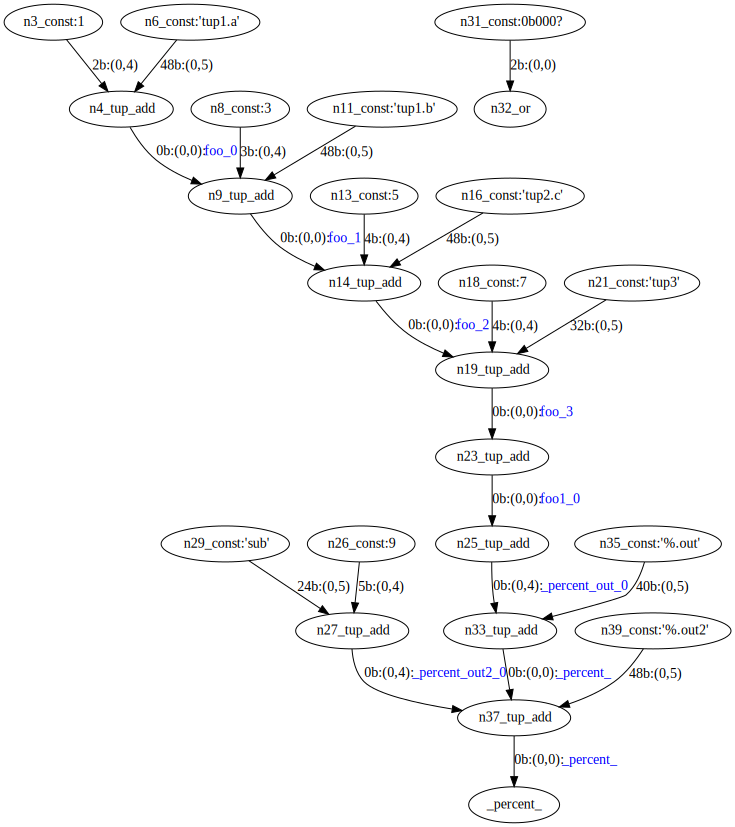

In [11]:
g3 = graphviz.Source.from_file("hier_tuple_io.dot")
g3

### Saving the graph to image file


In [12]:
# set image format
g3.format = "png"

# set the filename
filename = "hier_tuple_io"

# render to file
g3.render(filename)

# file is now saved to the folder where this ipynb is

'hier_tuple_io.png'

## Appendix

If, however, a Jupyter kernel of another programming language is needed, visualizing a GraphViz is no longer at ease. There are ways of achieving those, however, they usually require tedious compilations.

### C++ Support
I'm not fluent in large-scale C++ programming and compiling, but below is an example for using GraphViz library. This dot-to-image conversion script is written in C++. [reference](https://stackoverflow.com/questions/45225761/generate-image-of-graphviz-graph-given-dot-text-c)

```bash
sudo apt-get install graphviz-lib && sudo apt-get install libgraphviz-dev
```
Then, in a C++ file,
```C++
#include <graphviz/gvc.h> // graphviz here is a debian library of GraphViz

bool saveImageGV(std::string file_path){
    GVC_t *gvc;
    Agraph_t *g;
    FILE *fp;
    gvc = gvContext();
    fp = fopen((file_path+".dot").c_str(), "r");
    g = agread(fp, 0);
    gvLayout(gvc, g, "dot");
    gvRender(gvc, g, "png", fopen((file_path+".png").c_str(), "w"));
    gvFreeLayout(gvc, g);
    agclose(g);
    return (gvFreeContext(gvc));
}
```

And here is the [link](http://www.graphviz.org/pdf/libguide.pdf) to the official guide of using GraphViz in C as a library.


### Future Work
1. Enabling a live web-based terminal with LiveHD, or
2. Bring back colorful LiveHD text to Jupyter
3. Port Jupyter server into LiveHD kernel with the help from LiveHD dev team

### Appreciation
Thanks to communities such as StackOverflow for assisting me at many GraphViz conundrums. 

Special thanks to this quarter's Professor Renau and TA for accepting me, a young man with focus purely at software levels and zero background in computer architecture.

At this moment, I have delivered Jupyter + LiveHD.